In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir))))

In [2]:
# imports

import pandas as pd
import numpy as np
from src.data_ingester.data_ingester_factory import DataIngesterFactory
from src.analysis.basic_data_inspection import DataTypesInspectionStrategy, DataSummaryInspectionStrategy
from src.analysis.inspection_decorator import Inspector
from src.analysis.missing_value_analysis import BasicMissingValueAnalyser

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)

In [3]:
#extract data
df = DataIngesterFactory.get_data_ingester('.zip').ingest('../data/archive-online.zip')
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71


In [4]:
inspecor = Inspector(df)
inspecor.add_strategy(DataTypesInspectionStrategy()).add_strategy(DataSummaryInspectionStrategy()).execute()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB
None
Neumerical Information
        customer_id   product_id  category_id     quantity        price  \
count   1000.000000  1000.000000  1000.000000  1000.

Basic Missing Values Identified
review_score    201
gender          103
dtype: int64


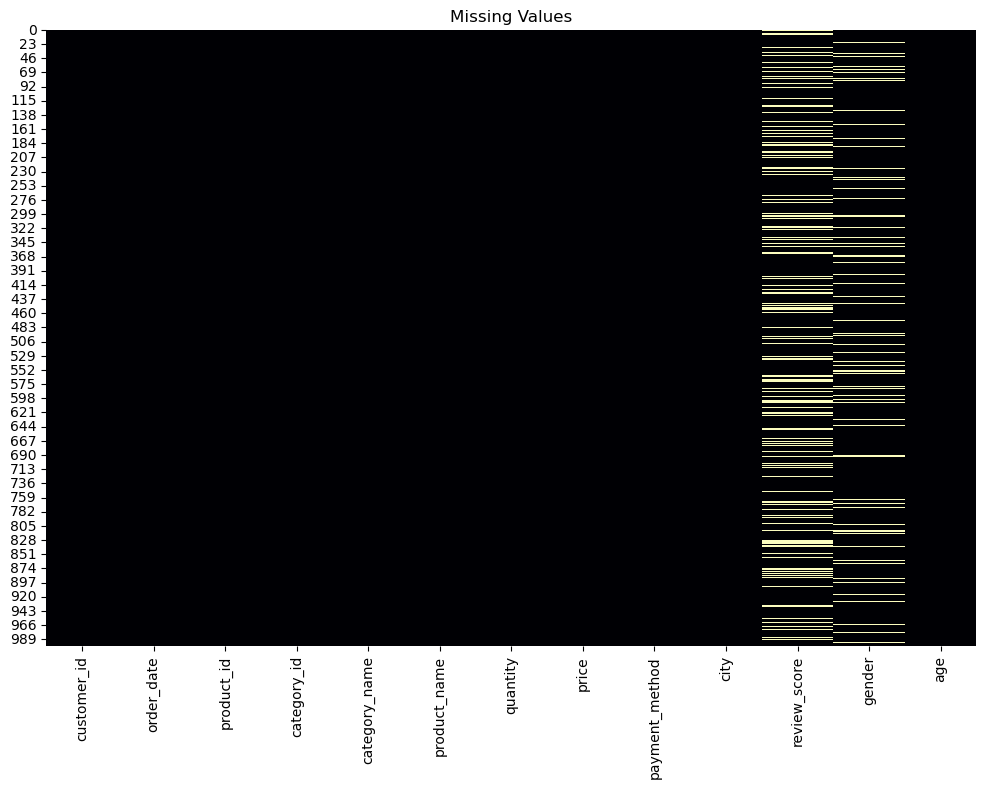

In [5]:
analyzer = BasicMissingValueAnalyser()
analyzer.analyse(df)

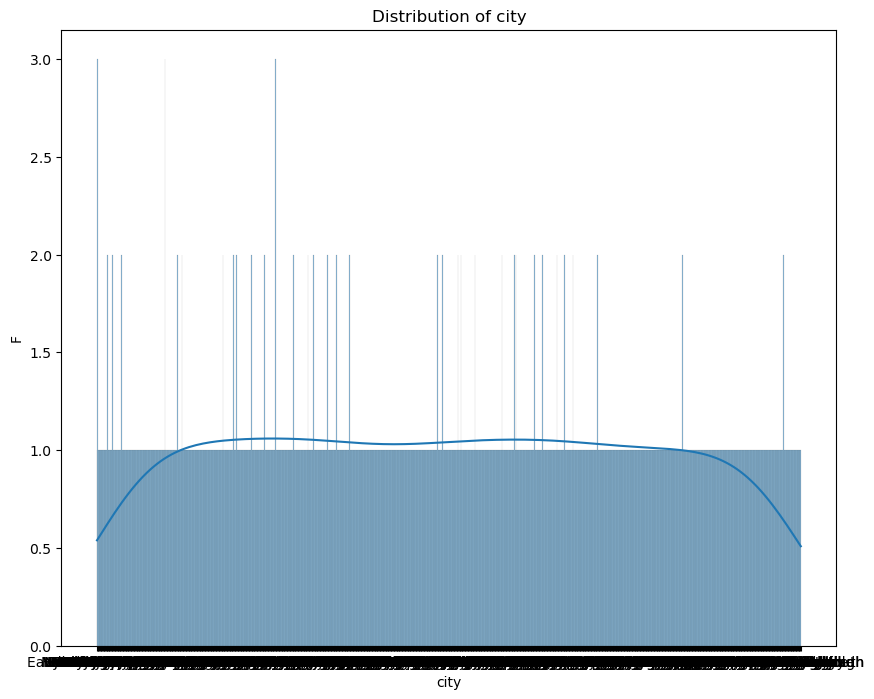

In [6]:
from src.analysis.varient_analysis import NumericalUnivarientAnalyzer

# Univarient analysers
nva = NumericalUnivarientAnalyzer('city')
nva.analyse(df)

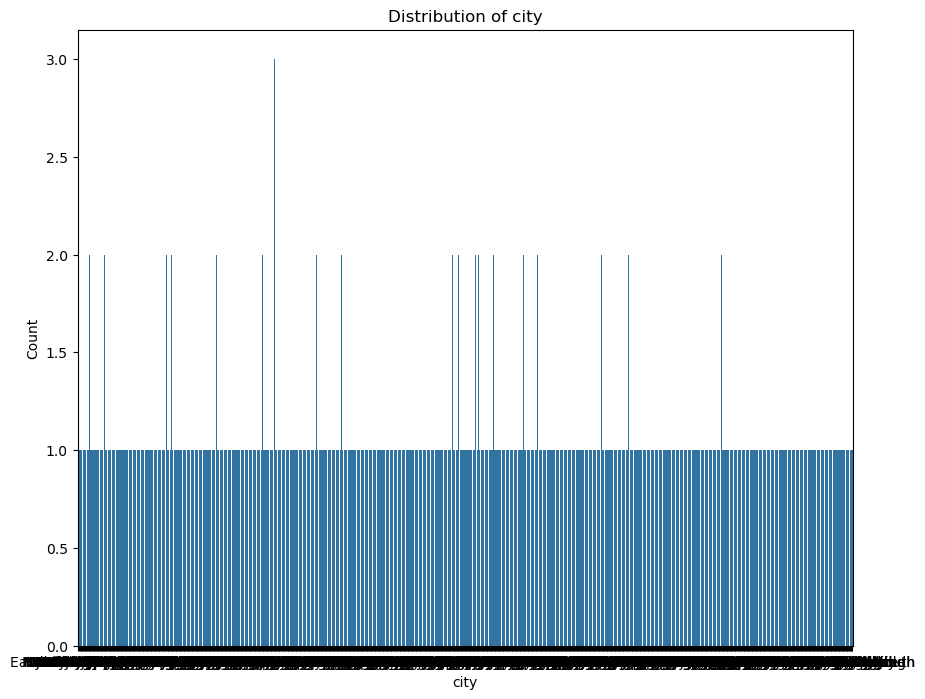

In [7]:
from src.analysis.varient_analysis import CategoricalUnivarientAnalyzer

# Univarient analysers
nva = CategoricalUnivarientAnalyzer('city')
nva.analyse(df)

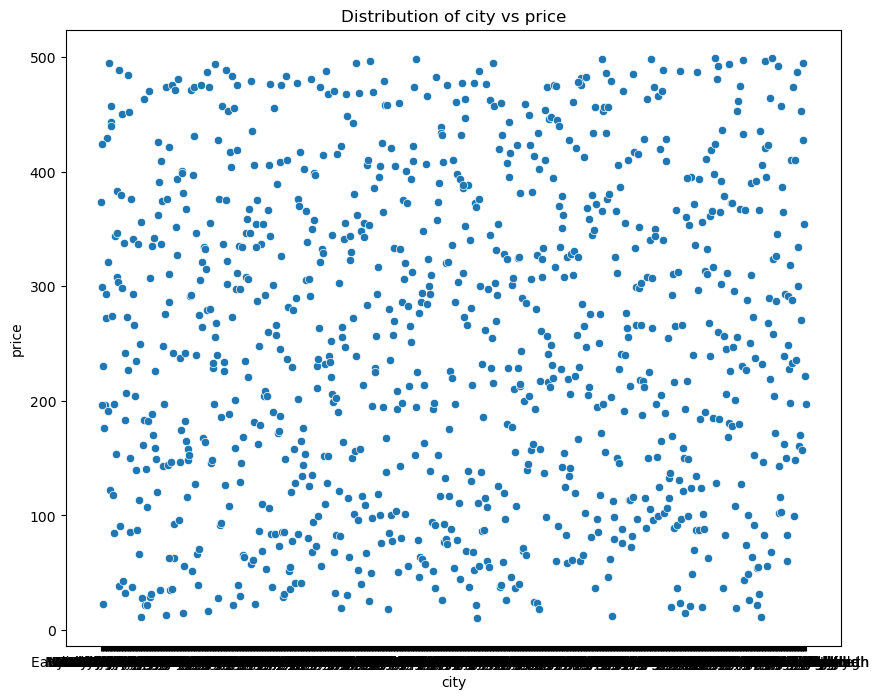

In [8]:
from src.analysis.varient_analysis import NumericalBiVarientAnalysis

# Univarient analysers
nbva = NumericalBiVarientAnalysis('city', 'price')
nbva.analyse(df)

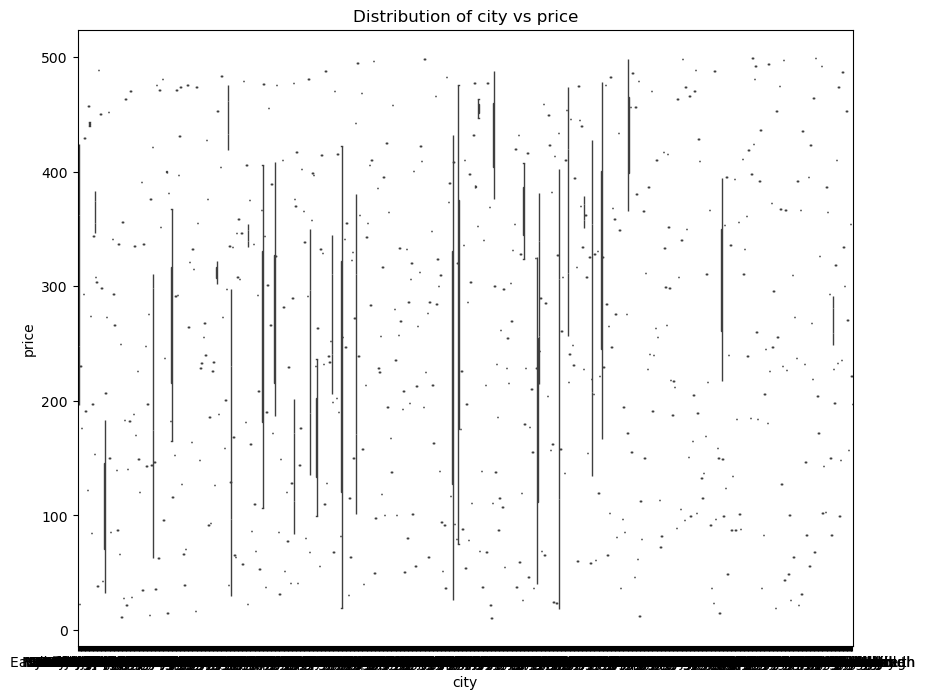

In [9]:
from src.analysis.varient_analysis import CategoricalBiVarientAnalysis

# Univarient analysers
nbva = CategoricalBiVarientAnalysis('city', 'price')
nbva.analyse(df)